In [1]:
#%pip install git+https://github.com/jgieseler/solo-epd-loader --upgrade
#%pip install calc_electrons

In [2]:
from SOLO_loaders import solo_mag_loader
from solo_functions import calc_pa_coverage, calc_av_en_flux_EPD, calc_EPT_corrected_e, print_HET_energies, print_EPT_energies
from epd_plot_shift import *
from run_the_fit import *
#from solo_epd_loader import calc_electrons
from solo_epd_loader import epd_load, calc_electrons, combine_pixels # import via pip
import datetime as dt
from pandas.tseries.frequencies import to_offset
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.dates as mdates
from matplotlib.colors import LogNorm
from matplotlib.ticker import AutoMinorLocator 
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['font.size'] = 10
plt.rcParams['agg.path.chunksize'] = 20000
import numpy as np
import pandas as pd
import sys


col_list = plt.cm.rainbow(np.linspace(0.,0.95,16))

/home/annafed/anaconda3/envs/annamaria/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
outpath = r'/home/annafed/Documents/STIX_EPD_event_analysis/STEP_EPD_comparison/'
intensity_label = 'Flux\n/(s cm² sr MeV)'

save_fig = False
save = True

date = datetime(2022, 4, 15, 3, 2) #onset time or event ID inj time specified later
t_inj = str(date)[:-3].replace(' ', '-').replace(':', '')
date_folder = t_inj

year = 2022
startdate = dt.datetime(year, 4, 15, 8, 30)
enddate = dt.datetime(year, 4, 15, 12, 30)


mag_data_product = 'l2'# 'l2', 'll'
data_product = 'l2'
instrument = 'EPT'
species = 'p' # e or p
direction = 'sun'
ept_ion_conta_corr = True  # if true EPT electron fluxes are corrected for ion contamination
plot_pa_cov = True



av = 5  # needed for solo_mag_loader
averaging = f'{av}min' 

## EPT:
en_channel = 1
## en_channel: when a list of two elements is provided, an averaged energy channel is used (not yet supported for STEP!). 
## If only one element is provided, then only this one channel is used.

## STEP
step_en_channel = 29

# 2, 25 e en chan
# 1, 29 p en chan
#-----------------
if species in ['e', 'electrons']:
    step_species = 'Electron'
if species in ['p', 'i', 'protons', 'ions']:
    step_species = 'Magnet'



In [4]:
print(averaging)

5min


# LOAD DATA

In [5]:
path =  r'/home/annafed/Documents/STIX_EPD_event_analysis/STEP_EPD_comparison/'
downloadpath = f'{path}l2/epd/{instrument}/'
sdate = int(f'{startdate.date()}'.replace('-', ''))
edate = int(f'{enddate.date()}'.replace('-', ''))



# MAG and PA coverage
print('Loading MAG...')
msdate = dt.datetime.combine(startdate.date(), dt.time.min)
medate = dt.datetime.combine(enddate.date()+ dt.timedelta(days=1), dt.time.min) #+ dt.timedelta(days=1)
enddate_epd = dt.datetime.combine(enddate.date(), dt.time.max)
try:
    mag_srf = solo_mag_loader(msdate, medate, level=mag_data_product, frame='srf', av=averaging, path=path)
except:
    print('changing mag data product to LL')
    mag_type = 'LL'
    mag_srf = solo_mag_loader(msdate, medate, level=mag_data_product,frame='srf', av=averaging, path=path)

mag_srf = mag_srf[mag_srf.index <= enddate_epd]

coverage = calc_pa_coverage(instrument, mag_srf)
coverage_step = calc_pa_coverage('step', mag_srf)

print('Loading STEP...')
df_particles_step_org, energies_step = epd_load('step', level=data_product, startdate=sdate, enddate=edate, path=path, autodownload=True)

print('Loading '+instrument+'...')
if instrument in ['EPT', 'HET']:
    df_sun_p, df_sun_e, energies = epd_load(instrument, level=data_product, startdate=sdate, enddate=edate, viewing='sun', path=path, autodownload=True)

Loading MAG...
Loading MAG...
Calculating PA coverage for EPT...


100%|██████████| 288/288 [00:00<00:00, 9243.43it/s]


Calculating PA coverage for step...
Opening of STEP just a placeholder! Replace with real value! This affects the 'min' and 'max' values of the pitch-angle, not the 'center' ones.


100%|██████████| 288/288 [00:00<00:00, 3015.41it/s]

Loading STEP...


Loading /home/annafed/Documents/STIX_EPD_event_analysis/STEP_EPD_comparison/l2/epd/step/solo_L2_epd-step-main_20220415_V01.cdf
Loading EPT...


In [6]:
#df_particles_step_org

## print energy channels

In [7]:
print_EPT_energies(energies)  # for HET: print_HET_energies(energies)


Ions
0 ['0.0495 - 0.0574 MeV']
1 ['0.0520 - 0.0602 MeV']
2 ['0.0552 - 0.0627 MeV']
3 ['0.0578 - 0.0651 MeV']
4 ['0.0608 - 0.0678 MeV']
5 ['0.0645 - 0.0718 MeV']
6 ['0.0689 - 0.0758 MeV']
7 ['0.0729 - 0.0798 MeV']
8 ['0.0768 - 0.0834 MeV']
9 ['0.0809 - 0.0870 MeV']
10 ['0.0870 - 0.0913 MeV']
11 ['0.0913 - 0.0974 MeV']
12 ['0.0974 - 0.1034 MeV']
13 ['0.1034 - 0.1096 MeV']
14 ['0.1096 - 0.1173 MeV']
15 ['0.1173 - 0.1246 MeV']
16 ['0.1246 - 0.1333 MeV']
17 ['0.1333 - 0.1419 MeV']
18 ['0.1419 - 0.1514 MeV']
19 ['0.1514 - 0.1628 MeV']
20 ['0.1628 - 0.1744 MeV']
21 ['0.1744 - 0.1879 MeV']
22 ['0.1879 - 0.2033 MeV']
23 ['0.2033 - 0.2189 MeV']
24 ['0.2189 - 0.2364 MeV']
25 ['0.2364 - 0.2549 MeV']
26 ['0.2549 - 0.2744 MeV']
27 ['0.2744 - 0.2980 MeV']
28 ['0.2980 - 0.3216 MeV']
29 ['0.3216 - 0.3494 MeV']
30 ['0.3494 - 0.3810 MeV']
31 ['0.3810 - 0.4117 MeV']
32 ['0.4117 - 0.4472 MeV']
33 ['0.4472 - 0.4850 MeV']
34 ['0.4850 - 0.5255 MeV']
35 ['0.5255 - 0.5734 MeV']
36 ['0.5734 - 0.6216 MeV']
37 ['

In [8]:
for i in df_particles_step_org.columns: print(i)

DELTA_EPOCH
Integral_01_Flux_0
Integral_01_Flux_1
Integral_01_Flux_2
Integral_01_Flux_3
Integral_01_Flux_4
Integral_01_Flux_5
Integral_01_Flux_6
Integral_01_Flux_7
Integral_01_Flux_8
Integral_01_Flux_9
Integral_01_Flux_10
Integral_01_Flux_11
Integral_01_Flux_12
Integral_01_Flux_13
Integral_01_Flux_14
Integral_01_Flux_15
Integral_01_Flux_16
Integral_01_Flux_17
Integral_01_Flux_18
Integral_01_Flux_19
Integral_01_Flux_20
Integral_01_Flux_21
Integral_01_Flux_22
Integral_01_Flux_23
Integral_01_Flux_24
Integral_01_Flux_25
Integral_01_Flux_26
Integral_01_Flux_27
Integral_01_Flux_28
Integral_01_Flux_29
Integral_01_Flux_30
Integral_01_Flux_31
Integral_01_Uncertainty_0
Integral_01_Uncertainty_1
Integral_01_Uncertainty_2
Integral_01_Uncertainty_3
Integral_01_Uncertainty_4
Integral_01_Uncertainty_5
Integral_01_Uncertainty_6
Integral_01_Uncertainty_7
Integral_01_Uncertainty_8
Integral_01_Uncertainty_9
Integral_01_Uncertainty_10
Integral_01_Uncertainty_11
Integral_01_Uncertainty_12
Integral_01_Uncer

# time averaging and EPT ion conta corr

In [9]:
if averaging is not None:
    coverage = coverage.resample(averaging,label='left').mean()
    coverage.index = coverage.index + to_offset(pd.Timedelta(averaging)/2)
    
    #if instrument == 'STEP':
    if species == 'e':
        contamination_threshold = 2
        df_step = calc_electrons(df=df_particles_step_org, meta=energies_step, 
                                   contamination_threshold=contamination_threshold, only_averages=False,
                                   resample=averaging)
        df_step_inner = combine_pixels(df=df_step, meta=energies_step, pixels=['02', '03', '04', '07', '08', '09', '12', '13', '14'])
    else:
        #None
        df_step = df_particles_step_org.resample(averaging).mean() #[f'Magnet_Avg_Flux_{step_en_channel}']
        df_step_inner = combine_pixels(df=df_step, meta=energies_step, pixels=['02', '03', '04', '07', '08', '09', '12', '13', '14'])
    
        
        #df_step[f'Magnet_Avg_Flux_{channel}'].resample(resample).mean()#.plot(ax = axs[1], logy=True, label='STEP '+energies_step["Bins_Text"][channel][0])

        # to do: implement ion fluxes
        #df_sun = df_particles_step_org  
        
        
    if instrument in ['EPT', 'HET']:
        df_sun_p   = df_sun_p.resample(averaging,label='left').mean()
        df_sun_p.index = df_sun_p.index + to_offset(pd.Timedelta(averaging)/2)
    
    if instrument in ['EPT', 'HET']:
        df_sun_e   = df_sun_e.resample(averaging,label='left').mean()
        df_sun_e.index = df_sun_e.index + to_offset(pd.Timedelta(averaging)/2)

#if instrument=='EPT':
##    if ept_ion_conta_corr:
 #      df_sun_e = calc_EPT_corrected_e(df_sun_e['Electron_Flux'], df_sun_p['Ion_Flux'])




In [10]:
#df_step_inner['Electron_Comb_Flux_22']
df_step_inner

,DELTA_EPOCH,Integral_01_Flux_0,Integral_01_Flux_1,Integral_01_Flux_2,Integral_01_Flux_3,Integral_01_Flux_4,Integral_01_Flux_5,Integral_01_Flux_6,Integral_01_Flux_7,Integral_01_Flux_8,...,Magnet_Comb_Uncertainty_22,Magnet_Comb_Uncertainty_23,Magnet_Comb_Uncertainty_24,Magnet_Comb_Uncertainty_25,Magnet_Comb_Uncertainty_26,Magnet_Comb_Uncertainty_27,Magnet_Comb_Uncertainty_28,Magnet_Comb_Uncertainty_29,Magnet_Comb_Uncertainty_30,Magnet_Comb_Uncertainty_31
Time,,,,,,,,,,,,,,,,,,,,,
2022-04-15 00:00:00,1.0,12084680.0,7826352.50,6327958.00,3589004.000,2573668.000,1.692477e+06,1.722277e+06,1.987944e+06,1.419977e+06,...,10374.057443,7052.150965,6370.084652,2511.913257,1501.834108,2843.869797,2820.422830,2335.209911,1187.860850,916.642329
2022-04-15 00:05:00,1.0,11125577.0,9451497.00,7607381.50,5123612.500,3502143.250,2.468196e+06,2.404252e+06,1.838314e+06,1.436782e+06,...,17936.873507,11487.287504,8017.879013,4682.126422,1531.455347,2552.474866,1551.886977,1344.930098,234.882881,676.807102
2022-04-15 00:10:00,1.0,13667197.0,8938293.00,8748489.00,6509710.500,4153705.000,2.350662e+06,2.300222e+06,2.319268e+06,1.411575e+06,...,7097.889018,10426.296176,4104.914869,3771.269121,3443.753941,1641.197694,1266.712113,880.360576,341.765548,617.810070
2022-04-15 00:15:00,1.0,9255330.0,7099314.50,5670957.00,3638507.500,2264176.500,1.586697e+06,1.572011e+06,1.378736e+06,1.260335e+06,...,7143.223687,7632.431161,4443.267380,4661.752323,805.392679,1739.430431,1425.419574,775.312043,947.373017,637.375640
2022-04-15 00:20:00,1.0,13331511.0,9451497.00,7849434.50,5272123.500,2117575.000,1.363384e+06,1.074978e+06,1.047411e+06,6.973852e+05,...,4990.413693,5150.866240,3959.704498,2087.597786,1530.658321,1192.679972,1175.566732,892.219348,225.468984,271.269911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-15 23:35:00,1.0,7912588.0,4960967.00,4045743.75,1955388.375,1433435.375,7.874719e+05,5.085917e+05,6.519602e+05,3.108826e+05,...,5757.162232,3549.127402,3836.163014,2688.864438,2798.082883,1986.770937,1214.165144,2230.599318,1026.507941,742.205751
2022-04-15 23:40:00,1.0,6234160.0,4362229.50,3976585.75,2549430.500,1254256.000,7.169521e+05,7.050931e+05,5.771451e+05,3.444915e+05,...,5939.384222,7269.958259,3248.078157,6018.179793,594.224308,1993.586995,2935.622591,1146.786741,1897.325910,1453.516687
2022-04-15 23:45:00,1.0,6665755.5,4576064.00,4322375.50,2227657.500,1400857.250,6.934454e+05,5.548274e+05,5.130178e+05,2.856759e+05,...,6730.208639,2576.485679,3953.914679,784.356236,5301.071202,1968.698965,1889.755088,918.287985,1103.967915,2628.918025


In [11]:
df_sun_p

Ion_Flux                                         \
                    Ion_Flux_0   Ion_Flux_1   Ion_Flux_2   Ion_Flux_3   
Time                                                                    
2022-04-15 00:02:30        NaN  1328.559204   620.175354   880.396301   
2022-04-15 00:07:30        NaN   937.925842   618.108093   638.153931   
2022-04-15 00:12:30        NaN  1048.270142   721.126099   638.153931   
2022-04-15 00:17:30        NaN   496.548950   412.072052   239.307739   
2022-04-15 00:22:30        NaN   551.721069   618.108093    79.769241   
...                        ...          ...          ...          ...   
2022-04-15 23:37:30        NaN  1048.270142  1442.252197  1276.307861   
2022-04-15 23:42:30        NaN   937.925842  1133.198120   717.923218   
2022-04-15 23:47:30        NaN  1599.991089  1030.180054  1037.000244   
2022-04-15 23:52:30        NaN  1213.786499  1854.324219  1196.538696   
2022-04-15 23:57:30        NaN  1489.646973  1133.198120  1116.769409   

                                                                         \
                      Ion_Flux_4   Ion_Flux_5   Ion_Flux_6   Ion_Flux_7   
Time                                                                      
2022-04-15 00:02:30   539.106445   282.810730   111.010559   105.080513   
2022-04-15 00:07:30   134.327362   187.912003   331.921570   209.460495   
2022-04-15 00:12:30   268.654724   469.779999   276.601288   157.095367   
2022-04-15 00:17:30   537.309448   328.846008   276.601288   261.825623   
2022-04-15 00:22:30   335.818390    93.956001   110.640518   157.095367   
...                          ...          ...          ...          ...   
2022-04-15 23:37:30  1007.455200   892.581970   663.843140   523.651245   
2022-04-15 23:42:30  1813.419434   986.538025  1438.326782  1099.667603   
2022-04-15 23:47:30   940.291443   892.581970  1217.045776  1204.397827   
2022-04-15 23:52:30  1611.928223  1315.384033  1604.287476   942.572205   
2022-04-15 23:57:30  1477.600952  1456.317993  1161.725464  1675.683960   

                                               ...   Alpha_Rate               \
                      Ion_Flux_8   Ion_Flux_9  ... Alpha_Rate_1 Alpha_Rate_2   
Time                                           ...                             
2022-04-15 00:02:30   320.801880   168.424103  ...     0.000000          0.0   
2022-04-15 00:07:30   127.893021   167.862686  ...     0.000000          0.0   
2022-04-15 00:12:30   191.839539     0.000000  ...     0.000000          0.0   
2022-04-15 00:17:30    63.946510   167.862686  ...     0.000000          0.0   
2022-04-15 00:22:30    63.946510    41.965672  ...     0.000000          0.0   
...                          ...          ...  ...          ...          ...   
2022-04-15 23:37:30   767.358154   713.416382  ...     0.000000          0.0   
2022-04-15 23:42:30  1214.983765   503.588013  ...     0.003333          0.0   
2022-04-15 23:47:30  1342.876709  1091.107422  ...     0.000000          0.0   
2022-04-15 23:52:30  1406.823242   797.347778  ...     0.000000          0.0   
2022-04-15 23:57:30  1214.983765  1091.107422  ...     0.000000          0.0   

                                                                         \
                    Alpha_Rate_3 Alpha_Rate_4 Alpha_Rate_5 Alpha_Rate_6   
Time                                                                      
2022-04-15 00:02:30          0.0          0.0          0.0     0.000000   
2022-04-15 00:07:30          0.0          0.0          0.0     0.000000   
2022-04-15 00:12:30          0.0          0.0          0.0     0.000000   
2022-04-15 00:17:30          0.0          0.0          0.0     0.000000   
2022-04-15 00:22:30          0.0          0.0          0.0     0.000000   
...                          ...          ...          ...          ...   
2022-04-15 23:37:30          0.0          0.0          0.0     0.000000   
2022-04-15 23:42:30          0.0          0.0          0.0     0.000000   
20

In [12]:
#df_sun.keys

In [13]:
#df_sun['Ion_Flux']



In [14]:
if species in ['e', 'electrons']:
    if instrument in ['EPT', 'HET']:
        df_sun = df_sun_e
    en_str = energies['Electron_Bins_Text']
    ch_string = 'Electrons'
    if instrument == 'EPT':
        if ept_ion_conta_corr:
            ch_string = 'Electrons (corr)'
    
if species in ['p', 'i', 'protons', 'ions']:
    if instrument in ['EPT', 'HET']:
        df_sun = df_sun_p
    if instrument in ['STEP', 'EPT']: 
        en_str = energies['Ion_Bins_Text']
        ch_string = 'Ions'
    if instrument == 'HET': 
        en_str = energies['H_Bins_Text']
        ch_string = 'Protons'



######################################################################################
#if instrument == 'STEP':
if species in ['e', 'electrons']:
    en_channel_string_step = energies_step['Electron_Bins_Text'][step_en_channel][0]
if species in ['p', 'i', 'protons', 'ions']:
    en_channel_string_step = energies_step['Bins_Text'][step_en_channel]

# EPT / HET    
I_sun, en_channel_string = calc_av_en_flux_EPD(df_sun['Ion_Flux'], energies, en_channel, species, instrument)




# MAKE THE PLOT

In [15]:
#startdate = dt.datetime(year, 10, 28, 15, 30)
#enddate = dt.datetime(year, 10, 28, 17, 30)

particle = ''
if species == 'e':
    particle = 'electron'
else:
    particle = 'proton'

In [16]:
#startdate = dt.datetime(year, 10, 28, 15, 50)
#enddate = dt.datetime(year, 10, 28, 20, 30)


<IPython.core.display.Javascript object>


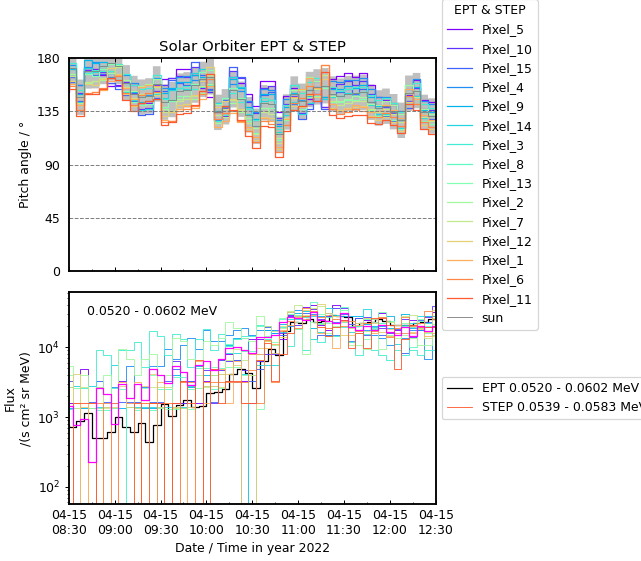

In [17]:
%matplotlib notebook
panels = 1
if plot_pa_cov:
    panels = panels +1 
if panels <=2:
    figsize = (8,7)
if 2 < panels <=5:
    figsize = (8,5)
if panels > 5:
    figsize = (7,9)
fig, axes = plt.subplots(panels, figsize=figsize, sharex=True) #figsize=(9,7)
#color = {'sun':'crimson','asun':'orange', 'north':'darkslateblue', 'south':'c'}
color = {'sun':'gray'}
axnum = 0

plist = [5,10,15,4,9,14,3,8,13,2,7,12,1,6,11]  # STEP pixel list


ax = axes[axnum]
if instrument in ['HET', 'EPT']:    
    flux_dic = {'sun': I_sun}#, 'asun':I_asun, 'north':I_north, 'south':I_south}

if plot_pa_cov:
    # Pitch angle coverage:
    ####################################################################
    # instrument == 'STEP':
    for i in range(15):
        p = plist[i]
        ax.plot(coverage_step.index, coverage_step[f'Pixel_{p}']['center'], color = col_list[i], 
                linewidth=1, label=f'Pixel_{p}', drawstyle='steps-mid')
    if instrument in ['HET', 'EPT']: 
        #for direction in ['sun', 'asun', 'north', 'south']: 
        col = color[direction]
        # fill the minimum-maximum range of the pitch angle coverage
        ax.fill_between(coverage.index, coverage[direction]['min'], coverage[direction]['max'], alpha=0.5, color=col, edgecolor=col, linewidth=0.0, step='mid')
        # plot the central pitch angle as a thin line
        ax.plot(coverage.index, coverage[direction]['center'], linewidth=0.7, label=direction, color=col, drawstyle='steps-mid')



    ax.axhline(y=90, color='gray', linewidth=0.8, linestyle='--')
    ax.axhline(y=45, color='gray', linewidth=0.8, linestyle='--')
    ax.axhline(y=135, color='gray', linewidth=0.8, linestyle='--')


    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title=instrument+ ' & STEP')
    ax.set_ylim([0, 180])
    ax.yaxis.set_ticks(np.arange(0, 180+45, 45))
    ax.set_xlim([coverage.index[0], coverage.index[-1]])
    ax.set_ylabel('Pitch angle / °')
    ax.tick_params(axis="x",direction="in", which='both', pad=-15)
    ax.tick_params(labelbottom=False, labeltop=False, labelleft=True, labelright=False, bottom=True, top=True, left=False, right=False)
    axnum = axnum + 1
    

# Intensities
if instrument in ['HET', 'EPT']: 
    ax = axes[axnum]
    av_flux = flux_dic[direction]
    ax.plot(av_flux.index.values, av_flux.values, linewidth=1, label=instrument+' '+en_channel_string, color='k', drawstyle='steps-mid')

# instrument == 'STEP':
for i in range(15):
    p = plist[i]
    ax = axes[axnum]
    ax.plot(df_step.index, df_step[f'{step_species}_{p:02d}_Flux_{step_en_channel}'].values, color = col_list[i],
            linewidth=0.7, drawstyle='steps-mid')

    
ax.plot(df_step_inner.index, df_step_inner[f'{step_species}_Comb_Flux_{step_en_channel}'].values, color = 'magenta',
            linewidth=1, drawstyle='steps-mid')
    
    
# this is just for the step energy label:    
p=1
ax.plot([np.nan], [np.nan], color = col_list[i],
        linewidth=0.7, drawstyle='steps-mid', label='STEP '+str(en_channel_string_step[0]))


ax.text(0.05, 0.94, en_channel_string, horizontalalignment='left', verticalalignment='top', transform = ax.transAxes)
ax.set_yscale('log')
ax.set_ylabel(intensity_label)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.tick_params(axis="x",direction="in", which='both')#, pad=-15)
axnum = axnum + 1




ax.set_xlim(startdate, enddate)
#########################
ax = axes[-1]
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d\n%H:%M"))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.set_xlabel('Date / Time in year '+str(year))
axes[0].set_title(f'Solar Orbiter EPT & STEP')




plt.tight_layout()
fig.subplots_adjust(hspace=0.1)



if save_fig:
    en_ch_str = str(en_channel).replace('[', '')
    en_ch_str = en_ch_str.replace(']', '')
    en_ch_str = en_ch_str.replace(' ', '')
    en_ch_str = en_ch_str.replace(',', '-')
    plt.savefig(f'{outpath}{instrument}_EPT_vs_STEP_Pixels_{str(sdate)}_{species}_ch{en_ch_str}_{averaging}.png')
    plt.close()
else:
    plt.show()
    
if save:
    plt.savefig(path +date_folder+ '/plots/STEP-EPT-comparison-PA-'+direction+'-'+particle+'-'+averaging+'.png', dpi=300, bbox_inches='tight')


In [18]:
str(en_channel_string_step[0])

'0.0539 - 0.0583 MeV'

<IPython.core.display.Javascript object>


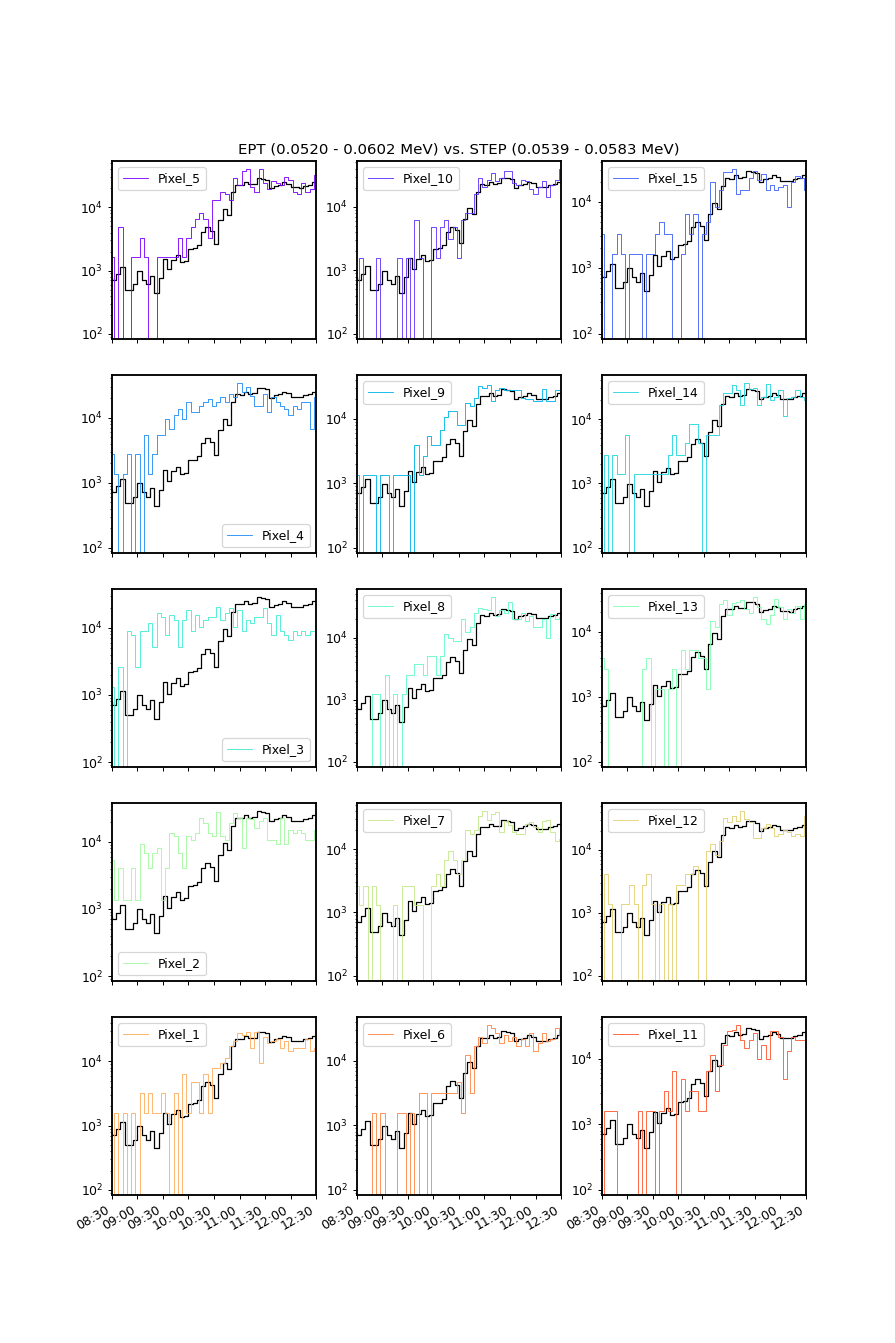

In [19]:
#%matplotlib notebook
f, axes = plt.subplots(5,3, figsize=(10, 15), sharex=True)
p=0
plist = [5,10,15,4,9,14,3,8,13,2,7,12,1,6,11]
for i, ax in enumerate(axes.flat):
    p=plist[i]
    av_flux = flux_dic[direction]
    ax.plot(av_flux.index.values, av_flux.values, linewidth=1, color='k', drawstyle='steps-mid')
    ax.plot(df_step.index, df_step[f'{step_species}_{p:02d}_Flux_{step_en_channel}'].values, color = col_list[i],
            linewidth=0.7, drawstyle='steps-mid',label=f'Pixel_{p}')
    ax.set_yscale('log')
    ax.legend()
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_xlim(startdate, enddate)
axes.flat[1].set_title(f'EPT ({en_channel_string}) vs. STEP ({en_channel_string_step[0]})')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
#plt.savefig(path +date_folder+ '/plots/STEP-EPT-comparison-PA-'+direction+'-'+averaging+'.png', dpi=300, bbox_inches='tight')

if save:
    plt.savefig(path +date_folder+ '/plots/STEP-EPT-comparison-pixels-intensity-'+direction+'-'+particle+'-'+averaging+'.png')#, dpi=300, bbox_inches='tight')



In [20]:
print('STEP-EPT-comparison-PA-'+direction+'-'+averaging)
print('STEP-EPT-comparison-pixels-intensity-'+direction+'-'+averaging)

STEP-EPT-comparison-PA-sun-5min
STEP-EPT-comparison-pixels-intensity-sun-5min
